# Mars Weather  

## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Imports relevant libraries. 
from splinter import Browser               # Provides an interface for automated online browsing. 
from bs4 import BeautifulSoup              # Enables parsing of HTML code by identifying CSS selectors. 
import matplotlib.pyplot as plt            # Assists with creating plots to visualise the data.
import pandas as pd                        # Helps work with data in a DataFrame stucture.
import csv                                 # Assists with exporting extracted data to a CSV file.

In [2]:
# Sets up which browser will perform the automated online browsing.  
browser = Browser('chrome')

### Step 1: Visits the Website

The website visited displays a table of Mars Temperature Data. Once familiarised with, the website was inspected using Chrome DevTools (to access right click on the webpage > inspect).

The purpose of this deliverable is to scrape the table values and to convert these into a DataFrame ready for analysis without the use of pd.read_html. Therefore, the following elements have been identified as being relevant for this web scrape. 
<li> table | class = "table" [the main table area which stores all the information of interest]</li> 
<li> tr | class = "data-row" [members of this class contain each of the table's row elements of interest]</li>
<li> td [contains each of the tables' data cell elements; located within the relevant table row's class.]</li>

In [3]:
# Visit the Mars Temperature Data website.
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrapes the Table

Despite being able to read the table of interest straight into a DataFrame using pd.read_html, a Beautiful Soup object has been created to scrape information from the HTML table.

In [4]:
# Extracts the html string from Mars Temperature Data webpage.
html = browser.html

# Creates a Beautiful Soup object.
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data.

# Extracts the table area identified earlier which contains all the elements required. 
mars_temp_table = soup.find("table", class_="table")

# Extracts the rows existent in the table of interest which were identified earlier to contain the required data cell elements. 
rows = mars_temp_table.find_all("tr", class_="data-row")

# Outputs all the table row classes (each of which contain a row's data cell elements).
print("Mars Temperature Data Table Row Divisions:")
rows

Mars Temperature Data Table Row Divisions:


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assembles the scraped data into a Pandas DataFrame. The columns of the created DataFrame will follow the structure outlined below:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Creates an empty list to store all the tables's data cell elements within.
mars_temperature_data = []

# Loops through each of the table's rows classes.
for row in rows:
        # Finds all the data cell elements contained within the currently observed row class.
        row_data_cell_elements = row.find_all('td')
        # Loops through each of the currently observed row class's data cell elements and add's it's text 
        # to the mars_temperature_data list.
        for data_cell_element in row_data_cell_elements: 
            mars_temperature_data.append(data_cell_element.text)
        
# Outputs the mars_temperature_data list (containing all the table's data cell elements). 
mars_temperature_data

['2',
 '2012-08-16',
 '10',
 '155',
 '6',
 '-75.0',
 '739.0',
 '13',
 '2012-08-17',
 '11',
 '156',
 '6',
 '-76.0',
 '740.0',
 '24',
 '2012-08-18',
 '12',
 '156',
 '6',
 '-76.0',
 '741.0',
 '35',
 '2012-08-19',
 '13',
 '157',
 '6',
 '-74.0',
 '732.0',
 '46',
 '2012-08-20',
 '14',
 '157',
 '6',
 '-74.0',
 '740.0',
 '57',
 '2012-08-21',
 '15',
 '158',
 '6',
 '-78.0',
 '740.0',
 '68',
 '2012-08-22',
 '16',
 '158',
 '6',
 '-77.0',
 '740.0',
 '79',
 '2012-08-23',
 '17',
 '159',
 '6',
 '-76.0',
 '742.0',
 '112',
 '2012-08-27',
 '21',
 '161',
 '6',
 '-74.0',
 '741.0',
 '114',
 '2012-08-28',
 '22',
 '162',
 '6',
 '-74.0',
 '742.0',
 '123',
 '2012-08-29',
 '23',
 '162',
 '6',
 '-75.0',
 '741.0',
 '134',
 '2012-08-30',
 '24',
 '163',
 '6',
 '-75.0',
 '742.0',
 '145',
 '2012-08-31',
 '25',
 '163',
 '6',
 '-75.0',
 '743.0',
 '156',
 '2012-09-01',
 '26',
 '164',
 '6',
 '-76.0',
 '745.0',
 '163',
 '2012-09-02',
 '27',
 '164',
 '6',
 '-75.0',
 '743.0',
 '170',
 '2012-09-03',
 '28',
 '165',
 '6',
 '-75

In [7]:
# Creates separate lists of data cell elements that correspond to each column header. 

# id: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first id]
id_list = mars_temperature_data[0: len(mars_temperature_data): 7]

# terrestrial_date: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first 
#                  terrestrial_date]
terrestrial_date_list = mars_temperature_data[1: len(mars_temperature_data): 7]

# sol: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first sol]
sol_list = mars_temperature_data[2: len(mars_temperature_data): 7]

# ls: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first ls]
ls_list = mars_temperature_data[3: len(mars_temperature_data): 7]

# month: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first month]
month_list = mars_temperature_data[4: len(mars_temperature_data): 7]

# min_temp: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first min_temp]
min_temp_list = mars_temperature_data[5: len(mars_temperature_data): 7]

# pressure_list: [Gets every value from the mars_temperature_data list with a 7 step interval, starting from the first pressure]
pressure_list = mars_temperature_data[6: len(mars_temperature_data): 7]

In [8]:
# Creates a dictionary with each column header as the key and each data cell elements list (corresponding to the header)
# as the value.
mars_temp_dict = {"id": id_list, 
                  "terrestrial_date": terrestrial_date_list, 
                  "sol": sol_list, 
                  "ls": ls_list, 
                  "month": month_list, 
                  "min_temp" : min_temp_list, 
                  "pressure" : pressure_list}

# Outputs the dictionary created. 
mars_temp_dict

{'id': ['2',
  '13',
  '24',
  '35',
  '46',
  '57',
  '68',
  '79',
  '112',
  '114',
  '123',
  '134',
  '145',
  '156',
  '163',
  '170',
  '171',
  '172',
  '173',
  '175',
  '176',
  '177',
  '178',
  '179',
  '180',
  '181',
  '182',
  '183',
  '184',
  '185',
  '186',
  '187',
  '188',
  '189',
  '190',
  '191',
  '192',
  '193',
  '194',
  '195',
  '196',
  '197',
  '198',
  '199',
  '200',
  '201',
  '202',
  '203',
  '204',
  '205',
  '206',
  '207',
  '208',
  '209',
  '210',
  '211',
  '212',
  '213',
  '214',
  '215',
  '216',
  '217',
  '218',
  '219',
  '220',
  '221',
  '222',
  '223',
  '224',
  '225',
  '226',
  '227',
  '228',
  '229',
  '230',
  '231',
  '233',
  '234',
  '235',
  '236',
  '237',
  '238',
  '239',
  '240',
  '241',
  '242',
  '3',
  '4',
  '5',
  '6',
  '7',
  '8',
  '9',
  '10',
  '11',
  '12',
  '14',
  '15',
  '16',
  '17',
  '18',
  '19',
  '20',
  '21',
  '22',
  '23',
  '25',
  '26',
  '27',
  '28',
  '29',
  '30',
  '31',
  '32',
  '33',
  '3

In [9]:
# Creates a DataFrame from the dictionary of lists which contain the table's data cell elements. 
mars_temperature_data_df = pd.DataFrame(mars_temp_dict)

# Outputs the DataFrame. 
mars_temperature_data_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepares Data for Analysis

The data types of each column are examined and converted to the appropritate data types so that the analysis can proceed. 

In [10]:
# Examines the data types of each column from the DataFrame just created.
print(f"{mars_temperature_data_df.dtypes}\n\nAll the columns are currently recognised as being an object")

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

All the columns are currently recognised as being an object


In [11]:
# Changes the data types for data analysis.

# Converts (id, sol, ls, month) columns to integers, (min_temp, and pressure) are converted to floats. 
mars_temperature_data_df = mars_temperature_data_df.astype({"id": int, 
                                                            "sol": int, 
                                                            "ls": int, 
                                                            "month": int, 
                                                            "min_temp": float, 
                                                            "pressure": float
                                                            }, errors = "raise")

# Converts terrestrial_date to be recognised as a datetime datatype. 
mars_temperature_data_df["terrestrial_date"] = pd.to_datetime(mars_temperature_data_df["terrestrial_date"])

In [12]:
# Confirms that the data type changes were successful.
print(f"{mars_temperature_data_df.dtypes}\n\nNow each column has the correct data type to be analyzed optimally")

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

Now each column has the correct data type to be analyzed optimally


### Step 5: Analyzes the Data

The dataset will now be analyzed using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)?
4. Which months have the lowest and the highest atmospheric pressure on Mars? 
5. About how many terrestrial (Earth) days exist in a Martian year?

In [13]:
# 1. How many months are there on Mars?

no_months = mars_temperature_data_df["month"].nunique()

print(f"There are {no_months} months on Mars.")

There are 12 months on Mars.


In [14]:
# 2. How many Martian days' worth of data are there?

martian_days = mars_temperature_data_df["sol"].nunique()

print(f"There are {martian_days} martian days' worth of data.")

There are 1867 martian days' worth of data.


In [15]:
# 3. What is the average low temperature by month?

# Groups the Mars Temperature Data DataFrame by the month column, and displays the average minimum temperatures. 
average_min_temp_df = mars_temperature_data_df.groupby(["month"])
average_min_temp_df = average_min_temp_df[["min_temp"]].mean()

# Displays the df.
average_min_temp_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


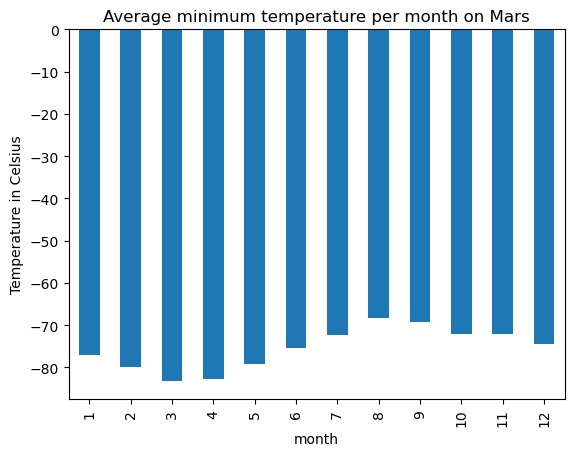

In [16]:
# Plots the average minimum temperature by month.
average_min_temp_df.plot(kind = "bar", 
                      title = "Average minimum temperature per month on Mars", 
                      xlabel = "month",
                      ylabel = "Temperature in Celsius",
                      legend = False)
plt.show()

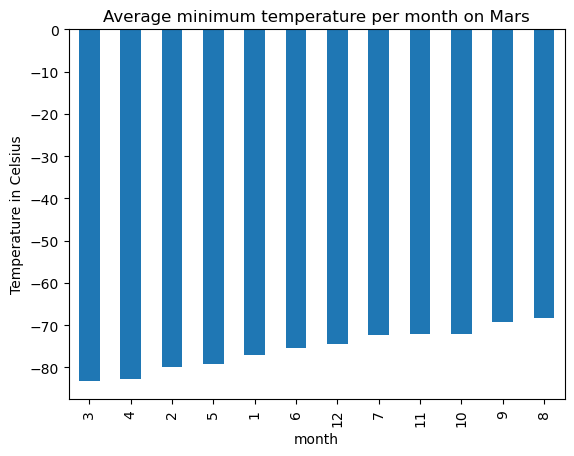

On average, the coldest month was month number 3.
On average, the hottest month was month number 8.


In [17]:
# Identifies the coldest and hottest months in Curiosity's location (easier to visualise with the temperatures ordered).

# Orders the average minimum temperature per month in ascending order.
ordered_min_temp_df = average_min_temp_df.sort_values("min_temp")

# Plots the ordered data. 
ordered_min_temp_df.plot(kind = "bar", 
                          title = "Average minimum temperature per month on Mars", 
                          xlabel = "month",
                          ylabel = "Temperature in Celsius",
                          legend = False)
plt.show()

print("On average, the coldest month was month number 3.")
print("On average, the hottest month was month number 8.")

In [18]:
# 4. Average pressure by Martian month.

# Groups the Mars Temperature Data DataFrame by the month column, and displays the average pressure. 
average_monthly_pressure_df = mars_temperature_data_df.groupby(["month"])
average_monthly_pressure_df = average_monthly_pressure_df[["pressure"]].mean()

# Orders the average pressure per month in ascending order.
average_monthly_pressure_df = average_monthly_pressure_df.sort_values("pressure")

# Displays the df.
average_monthly_pressure_df

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


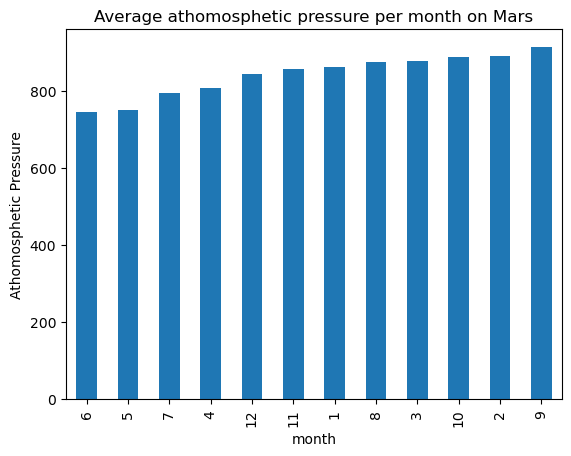

On average, month number 6 had the lowest athmospheric pressure.
On average, month number 9 had the highest athmospheric pressure.


In [19]:
# Plots the average pressure by month.
average_monthly_pressure_df.plot(kind = "bar", 
                                 title = "Average athomosphetic pressure per month on Mars", 
                                 xlabel = "month",
                                 ylabel = "Athomosphetic Pressure",
                                 legend = False)

plt.show()

print("On average, month number 6 had the lowest athmospheric pressure.")
print("On average, month number 9 had the highest athmospheric pressure.")

In [20]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Creates a DataFrame to visualise the minimum temperature for each martian day since Curiosity landed on Mars. 
daily_martian_min_temp_df = mars_temperature_data_df[["sol", "min_temp"]]
daily_martian_min_temp_df = daily_martian_min_temp_df.set_index("sol")

# Displays the df.
daily_martian_min_temp_df

,min_temp
sol,
10,-75.0
11,-76.0
12,-76.0
13,-74.0
14,-74.0
...,...
1973,-78.0
1974,-77.0
1975,-76.0


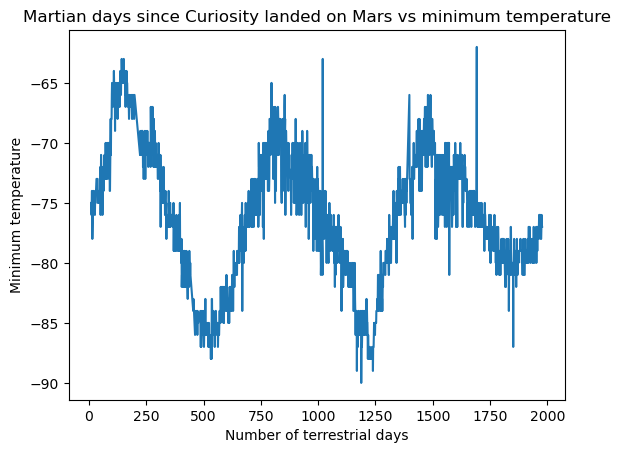

In [21]:
# Plots the minimum temperature for each day since Curiosity landed on Mars. 
daily_martian_min_temp_df.plot(title = "Martian days since Curiosity landed on Mars vs minimum temperature", 
                               xlabel = "Number of terrestrial days",
                               ylabel = "Minimum temperature",
                               legend = False)

plt.show()

The distance from peak to peak on the above graph would be a good indicator of how many terrestrial (earth) days there are in a Martian year as this represents the time Mars takes to circle the Sun once. 

When observed, the peak to peak distance is is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Saves the Data

Exports the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV
mars_temperature_data_df.to_csv('mars_temperature_data.csv', sep=',', index=False, encoding='utf-8')

In [23]:
browser.quit()